# Lab 4: Spatial Domain Filtering
### 1. Objectives
This lab focuses on understanding and applying spatial domain filtering techniques for image enhancement, specifically smoothing and sharpening. We will explore various filters to reduce noise and enhance edges and details in images.
### 2. Submission Guidelines:
- **File Format:** Ensure your submission is a Jupyter Notebook file.
- **File Naming Convention:** Rename your lab file in the following format:
    - Lab4_StudentFullName_StudentID.ipynb
- **Submission:** Please submit the zip file of Jupyter Notebook file to Moodle after you have completed.
    - Lab4_StudentFullName_StudentID.zip
### 3. Preparation
Before we begin, ensure you have the necessary libraries installed. 

In [1]:
# pip install ipykernel opencv-python numpy matplotlib scikit-image

#### Import required libraries

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from skimage import io, color

#### Loading Sample Images and Noisy Images
For this lab, we'll work with three individual images corrupted with common noise types::

1. **Salt and Pepper Noise**: An image with sparse black and white pixels.
2. **Gaussian Noise**: An image with noise distributed normally (often appearing as random variations in intensity).
3. **Binary Image**: An image with multiplicative noise (often appearing as graininess).

dditionally, we will use a folder named `road_images` containing multiple images for sharpening exercises.

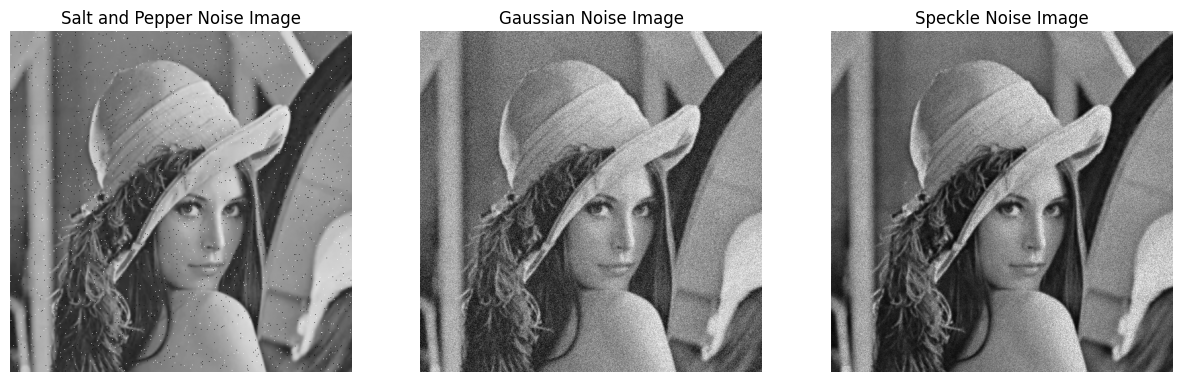

In [3]:
img_salt_pepper = cv2.imread('salt_pepper_noise.png', cv2.IMREAD_GRAYSCALE)
img_gaussian = cv2.imread('gaussian_noise.png', cv2.IMREAD_GRAYSCALE)
img_speckle = cv2.imread('speckle_noise.png', cv2.IMREAD_GRAYSCALE)

road_images_dir = 'road_images'

if img_salt_pepper is None or img_gaussian is None or img_speckle is None:
    print("Error: Could not load one or more noisy images. Please ensure they are in the correct path.")
else:
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(img_salt_pepper, cmap='gray')
    axes[0].set_title('Salt and Pepper Noise Image')
    axes[0].axis('off')
    axes[1].imshow(img_gaussian, cmap='gray')
    axes[1].set_title('Gaussian Noise Image')
    axes[1].axis('off')
    axes[2].imshow(img_speckle, cmap='gray')
    axes[2].set_title('Speckle Noise Image')
    axes[2].axis('off')
    plt.show()

#### Part A: Smoothing Filters
Smoothing filters are used to reduce noise and blur sharp edges in an image. They work by averaging or replacing pixel values in a neighborhood.


##### Assignment A.1: Mean Filter

Below are 3 images filtered by mean filter, your task is to produce the below.

<table>
  <tr>
    <td><img src="salt_pepper_mean.png" alt="Image 2" width="300"/></td>
    <td><img src="gaussian_mean.png" alt="Image 1" width="300"/></td>
    <td><img src="speckle_mean.png" alt="Image 3" width="300"/></td>
  </tr>
  <tr>
    <td align="center">Image 1</td>
    <td align="center">Image 2</td>
    <td align="center">Image 3</td>
  </tr>
</table>

The mean filter replaces each pixel's value with the average of its neighbors, including itself. This process blurs the image and reduces noise.

**Task**:
- Given an original matrix and a filtered matrix, identify whether a 3x3 mean filter has been applied.
- Apply a 3x3 mean filter to the `img_salt_pepper`, `img_gaussian`, and `img_speckle` images.


--- Applying Mean Filter to Noisy Images ---


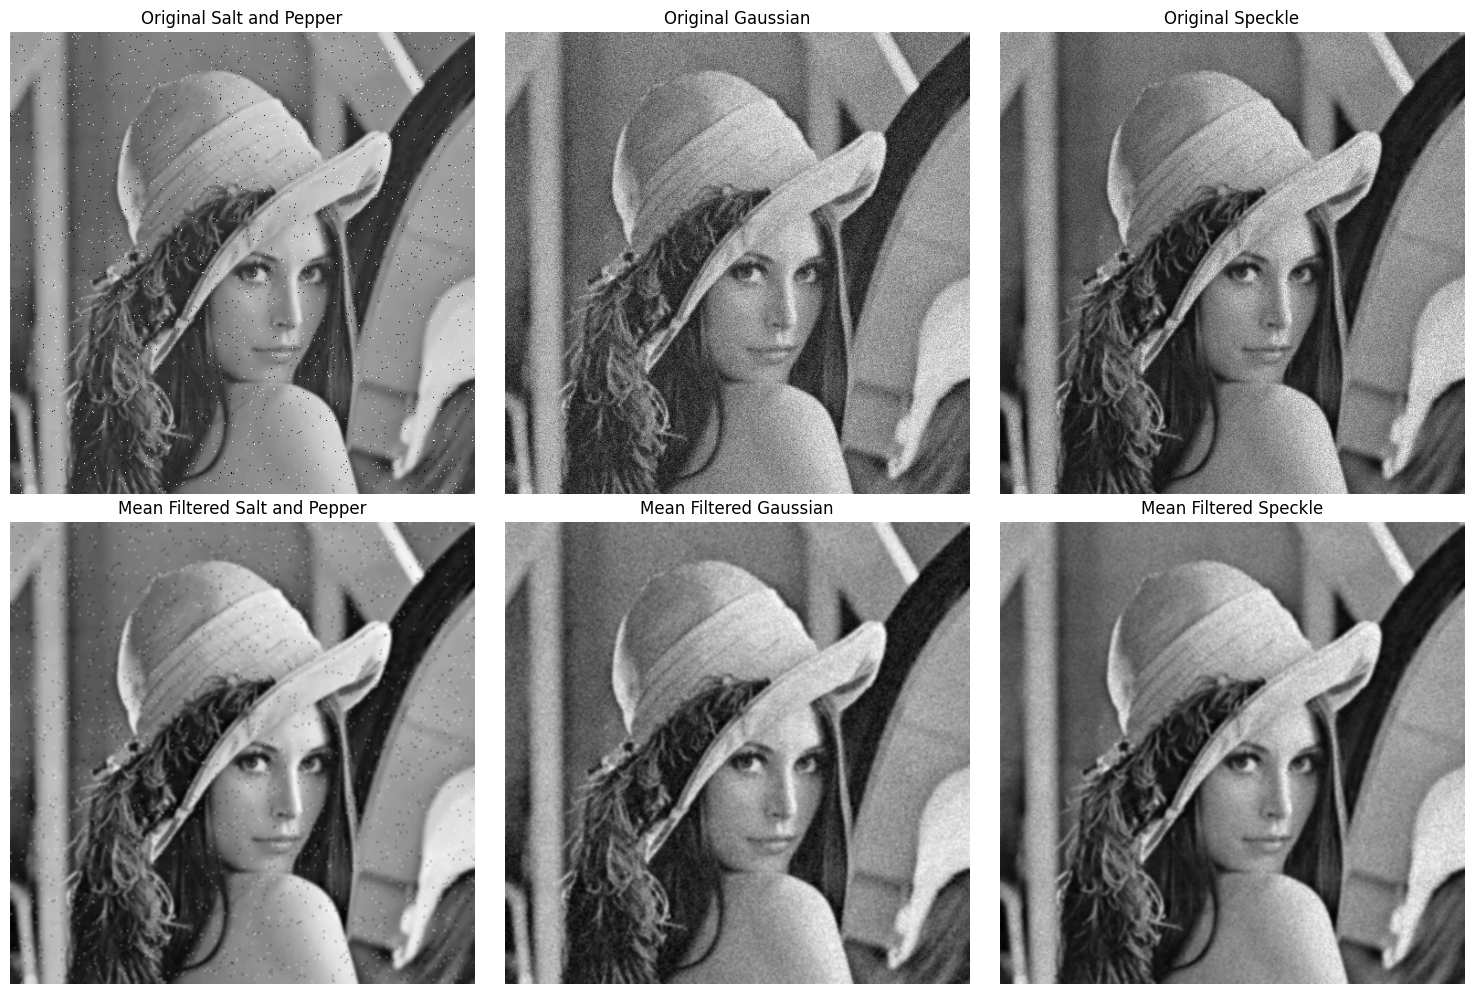

In [4]:
# TODO: Create a function for 3x3 mean filter
def mean_filter_3x3(image):
    kernel = np.ones((3, 3), np.float32) / 9
    return cv2.filter2D(image, -1, kernel)

print("\n--- Applying Mean Filter to Noisy Images ---")
img_salt_pepper_mean = mean_filter_3x3(img_salt_pepper)
img_gaussian_mean = mean_filter_3x3(img_gaussian)
img_speckle_mean = mean_filter_3x3(img_speckle)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0, 0].imshow(img_salt_pepper, cmap='gray')
axes[0, 0].set_title('Original Salt and Pepper')
axes[0, 0].axis('off')
axes[1, 0].imshow(img_salt_pepper_mean, cmap='gray')
axes[1, 0].set_title('Mean Filtered Salt and Pepper')
axes[1, 0].axis('off')

axes[0, 1].imshow(img_gaussian, cmap='gray')
axes[0, 1].set_title('Original Gaussian')
axes[0, 1].axis('off')
axes[1, 1].imshow(img_gaussian_mean, cmap='gray')
axes[1, 1].set_title('Mean Filtered Gaussian')
axes[1, 1].axis('off')

axes[0, 2].imshow(img_speckle, cmap='gray')
axes[0, 2].set_title('Original Speckle')
axes[0, 2].axis('off')
axes[1, 2].imshow(img_speckle_mean, cmap='gray')
axes[1, 2].set_title('Mean Filtered Speckle')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

##### Assignment A.2: Gaussian Blur

Gaussian blur uses a Gaussian function to calculate the transformation to be applied to each pixel in an image. It provides a smoother blur than the mean filter and is often preferred for noise reduction while preserving edges better.

**Task**:
- Apply Gaussian blur to the `img_salt_pepper`, `img_gaussian`, and `img_speckle` images. Experiment with different kernel sizes (e.g., 5x5) and sigma values.

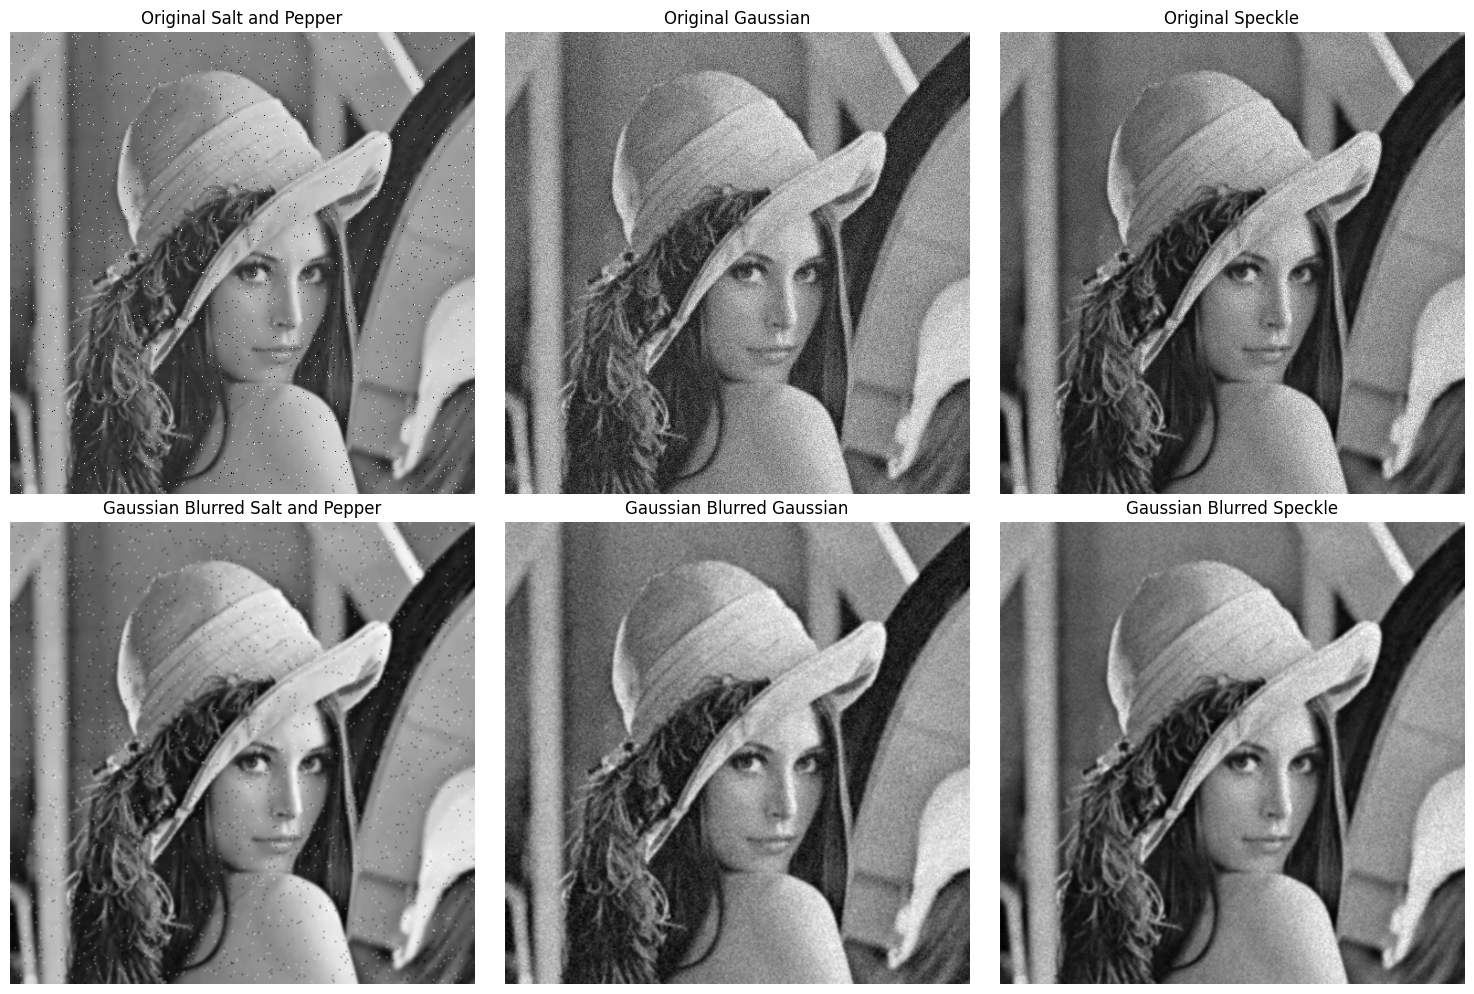

In [5]:
# TODO: Apply Gaussian Blur with 3x3 kernel
# Hint: Use cv2.GaussianBlur(image, ksize, sigmaX, dst=None, sigmaY=0)
# ksize is the Gaussian kernel size. ksize.width and ksize.height can differ but must be positive and odd.
# sigmaX is Gaussian kernel standard deviation in X direction.
# dst is the output image. If it is None, a new image is created.
# sigmaY is Gaussian kernel standard deviation in Y direction. If sigmaY is zero, it is set to be equal to sigmaX.
img_salt_pepper_gaussian = cv2.GaussianBlur(img_salt_pepper, (3, 3), 0)
img_gaussian_gaussian = cv2.GaussianBlur(img_gaussian, (3, 3), 0)
img_speckle_gaussian = cv2.GaussianBlur(img_speckle, (3, 3), 0)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0, 0].imshow(img_salt_pepper, cmap='gray')
axes[0, 0].set_title('Original Salt and Pepper')
axes[0, 0].axis('off')
axes[1, 0].imshow(img_salt_pepper_gaussian, cmap='gray')
axes[1, 0].set_title('Gaussian Blurred Salt and Pepper')
axes[1, 0].axis('off')

axes[0, 1].imshow(img_gaussian, cmap='gray')
axes[0, 1].set_title('Original Gaussian')
axes[0, 1].axis('off')
axes[1, 1].imshow(img_gaussian_gaussian, cmap='gray')
axes[1, 1].set_title('Gaussian Blurred Gaussian')
axes[1, 1].axis('off')

axes[0, 2].imshow(img_speckle, cmap='gray')
axes[0, 2].set_title('Original Speckle')
axes[0, 2].axis('off')
axes[1, 2].imshow(img_speckle_gaussian, cmap='gray')
axes[1, 2].set_title('Gaussian Blurred Speckle')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Original Gaussian')

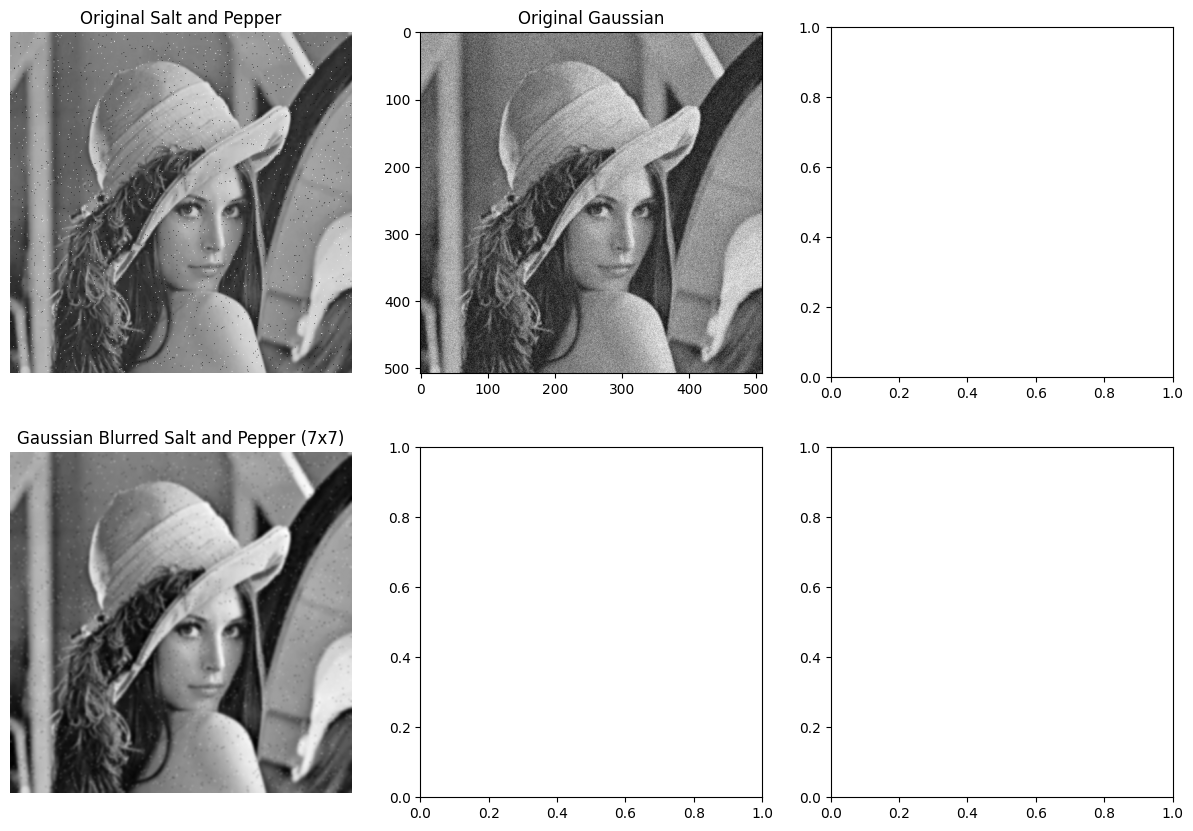

In [6]:
# TODO: Apply Gaussian Blur with 7x7 kernel
img_salt_pepper_gaussian_7x7 = cv2.GaussianBlur(img_salt_pepper, (7, 7), 0)
img_gaussian_gaussian_7x7 = cv2.GaussianBlur(img_gaussian , (7, 7), 0)
img_speckle_gaussian_7x7 = cv2.GaussianBlur(img_speckle, (7, 7), 0)   
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0, 0].imshow(img_salt_pepper, cmap='gray')
axes[0, 0].set_title('Original Salt and Pepper')
axes[0, 0].axis('off')
axes[1, 0].imshow(img_salt_pepper_gaussian_7x7, cmap='gray')
axes[1, 0].set_title('Gaussian Blurred Salt and Pepper (7x7)')
axes[1, 0].axis('off')
axes[0, 1].imshow(img_gaussian, cmap='gray')
axes[0, 1].set_title('Original Gaussian')


##### Assignment A.3: Median/Min/Max Filter

Below are 3 images filtered by mean filter, your task is to produce the below.

<table>
  <tr>
    <td><img src="salt_pepper_median.png" alt="Image 1" width="300"/></td>
    <td><img src="salt_pepper_min.png" alt="Image 2" width="300"/></td>
    <td><img src="salt_pepper_max.png" alt="Image 3" width="300"/></td>
  </tr>
  <tr>
    <td align="center">Image 1</td>
    <td align="center">Image 2</td>
    <td align="center">Image 3</td>
  </tr>
</table>

Median, minimum, and maximum filters are non-linear filters often used for noise reduction, especially for salt and pepper noise.
- **Median Filter**: Replaces the pixel value with the median of its neighbors. Excellent for salt and pepper noise.
- **Min Filter**: Replaces the pixel value with the minimum value in its neighborhood. Can make features thinner.
- **Max Filter**: Replaces the pixel value with the maximum value in its neighborhood. Can make features thicker.

**Task**:
- You are given an original image with salt and pepper noise and an image that has been filtered using either a max or min filter. Identify which filter was used.
- Apply the identified filter to the `img_salt_pepper` image and observe the results.


--- Applying Median/Min/Max Filters to Salt and Pepper Image ---


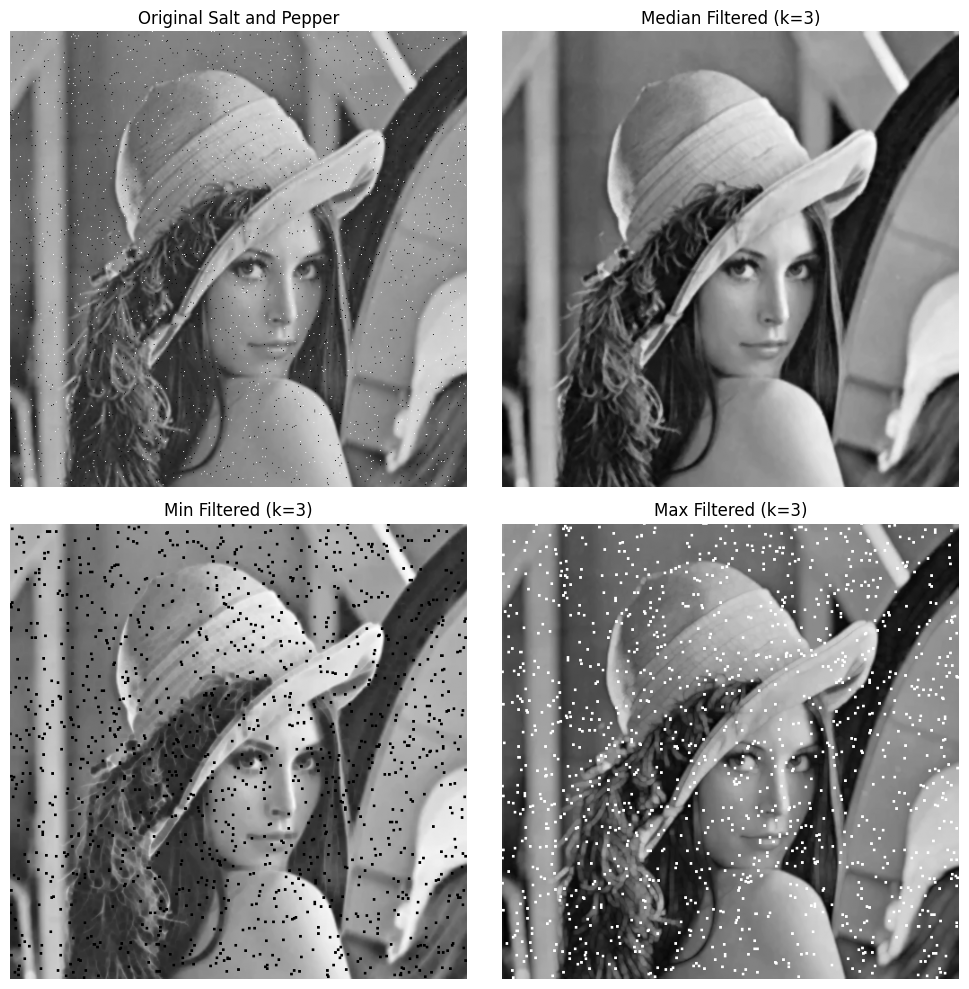

In [7]:
# TODO: Implement median filter
# Hint: Use cv2.medianBlur(image, ksize)
def median_filter(image, ksize):
    return cv2.medianBlur(image, ksize)

# TODO: Implement min filter
# Hint: Use cv2.erode(image, kernel, iterations=1) with a kernel of ones
def min_filter(image, ksize):
    kernel = np.ones((ksize, ksize), np.uint8)
    return cv2.erode(image, kernel, iterations=1)

# TODO: Implement max filter
# Hint: Use cv2.dilate(image, kernel, iterations=1) with a kernel of ones
def max_filter(image, ksize):
    kernel = np.ones((ksize, ksize), np.uint8)
    return cv2.dilate(image, kernel, iterations=1)

print("\n--- Applying Median/Min/Max Filters to Salt and Pepper Image ---")
k_size = 3 # Kernel size for these filters

img_salt_pepper_median = median_filter(img_salt_pepper, k_size)
img_salt_pepper_min = min_filter(img_salt_pepper, k_size)
img_salt_pepper_max = max_filter(img_salt_pepper, k_size)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(img_salt_pepper, cmap='gray')
axes[0, 0].set_title('Original Salt and Pepper')
axes[0, 0].axis('off')

axes[0, 1].imshow(img_salt_pepper_median, cmap='gray')
axes[0, 1].set_title(f'Median Filtered (k={k_size})')
axes[0, 1].axis('off')

axes[1, 0].imshow(img_salt_pepper_min, cmap='gray')
axes[1, 0].set_title(f'Min Filtered (k={k_size})')
axes[1, 0].axis('off')

axes[1, 1].imshow(img_salt_pepper_max, cmap='gray')
axes[1, 1].set_title(f'Max Filtered (k={k_size})')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

### Image Filtering Identification: Original, Max Filter, Min Filter

Below are three images. Each one shows a version of the same image:

- One is the **original**.
- One has been processed with a **max filter**, which enhances bright regions by replacing each pixel with the maximum value in its neighborhood.
- One has been processed with a **min filter**, which enhances dark regions by replacing each pixel with the minimum value in its neighborhood.

<table>
  <tr>
    <td><img src="image4.png" alt="Image B" width="250"/></td>
    <td><img src="image3.png" alt="Image A" width="250"/></td>
    <td><img src="image5.png" alt="Image C" width="250"/></td>
  </tr>
  <tr>
    <td align="center">Image A</td>
    <td align="center">Image B</td>
    <td align="center">Image C</td>
  </tr>
</table>

**Task:**  
Identify which image corresponds to each filter type (original, max filter, min filter).  
Justify your choices based on the visual effects of each filtering operation.

**Your Answer:**  
- Original image: ____________  
- Max filter applied: ____________  
- Min filter applied: ____________  
- Reasoning: ____________________________________________________________  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;


#### Part B: Sharpening Filters

Sharpening filters are used to enhance details and edges in an image by accentuating intensity differences.

##### Assignment B.1: Reading Images from Directory

Before applying sharpening filters, we need to load the images from the `road_images` directory.

**Task**:
- Write code to read all image files (e.g., `.png`, `.jpg`) from the `road_images` directory. Store them in a list.

Loaded: umm_000000.png
Loaded: um_000000.png
Loaded: um_000007.png
Loaded: um_000010.png
Loaded: um_000013.png
Loaded: um_000040.png

Successfully loaded 6 images from 'road_images'.


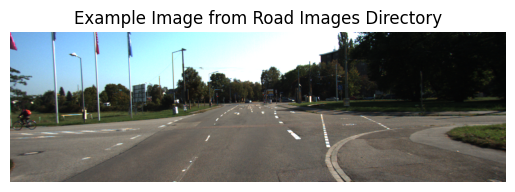

In [9]:
# TODO: Read images from the 'road_images' directory
road_images = []
for filename in os.listdir(road_images_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        img_path = os.path.join(road_images_dir, filename)
        img = cv2.imread(img_path) # Read as is, will convert to grayscale later if needed
        if img is not None:
            road_images.append(img)
            print(f"Loaded: {filename}")
        else:
            print(f"Failed to load: {filename}")

if len(road_images) == 0:
    print("No images found in 'road_images' directory. Please ensure the directory exists and contains images.")
else:
    print(f"\nSuccessfully loaded {len(road_images)} images from '{road_images_dir}'.")
    # Display the first loaded image as an example
    plt.imshow(cv2.cvtColor(road_images[0], cv2.COLOR_BGR2RGB))
    plt.title('Example Image from Road Images Directory')
    plt.axis('off')
    plt.show()

##### Assignment B.2: Laplacian Filter (Grayscale Processing)

The Laplacian filter is a second-order derivative filter used for edge detection and sharpening. It highlights regions of rapid intensity change.

**Task**:
- Convert the first image from `road_images` (or any selected image) to grayscale.
- Apply the Laplacian filter to this grayscale image.
- Save the resulting sharpened image to a file.

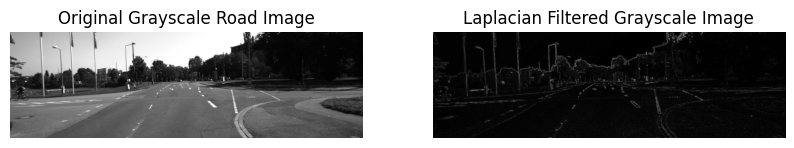

Laplacian filtered image saved as 'road_laplacian_sharpened.png'


In [10]:
if len(road_images) > 0:
    # Select the first image for this assignment
    selected_road_img_color = road_images[0]
    selected_road_img_gray = cv2.cvtColor(selected_road_img_color, cv2.COLOR_BGR2GRAY)

    # TODO: Apply Laplacian filter
    # Hint: Use cv2.Laplacian(image, ddepth)
    # ddepth is the desired depth of the destination image, e.g., cv2.CV_64F for float output
    # Then convert back to uint8 and scale if necessary, e.g., cv2.convertScaleAbs()
    laplacian_filtered_float = cv2.Laplacian(selected_road_img_gray, cv2.CV_64F)
    laplacian_filtered = cv2.convertScaleAbs(laplacian_filtered_float)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(selected_road_img_gray, cmap='gray')
    plt.title('Original Grayscale Road Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(laplacian_filtered, cmap='gray')
    plt.title('Laplacian Filtered Grayscale Image')
    plt.axis('off')
    plt.show()

    # Save the result
    output_filename_laplacian = 'road_laplacian_sharpened.png'
    cv2.imwrite(output_filename_laplacian, laplacian_filtered)
    print(f"Laplacian filtered image saved as '{output_filename_laplacian}'")
else:
    print("Cannot perform Laplacian filter: No road images were loaded.")

##### Assignment B.3: High-boost Filtering (Color Image Processing)

High-boost filtering is a generalization of unsharp masking that allows for more control over the sharpening effect. It works by adding a fraction of the unsharp mask (original - blurred) back to the original image. The formula is:

$$g(x,y)= f(x,y) + A \cdot (f(x,y) - \bar f(x,y))$$

where $f$ is the original image, 
$\bar f$ is the blurred image, and A is the boost factor (A > 1).

**Task**:
- Select one of the original color images from the `road_images` list.
- Apply High-boost filtering to this color image. Remember to process each color channel (R, G, B) separately or convert to a suitable color space (e.g., LAB, then sharpen L channel).
- Save the resulting sharpened image to a file.

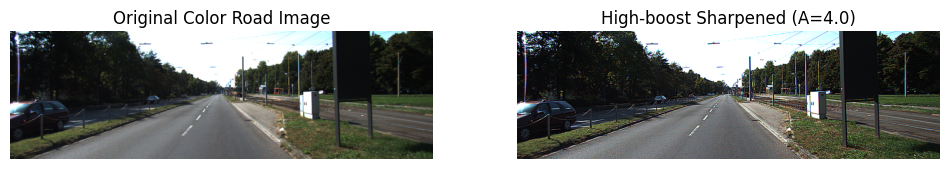

High-boost filtered image saved as 'road_highboost_sharpened.png'


In [15]:
if len(road_images) > 0:
    selected_color_img = road_images[1] if len(road_images) > 1 else road_images[0]

    # TODO: Create a function for High-boost filtering
    def highboost_filter(image, A, ksize=(5,5), sigmaX=0):
        blurred = cv2.GaussianBlur(image, ksize, sigmaX)
        mask = cv2.subtract(image, blurred)
        highboost = cv2.addWeighted(image, 1.0 + A, blurred, -A, 0)
        highboost = np.clip(highboost, 0, 255).astype(np.uint8)
        return highboost


    boost_factor = 4.0 # Experiment with this value (A > 1)

    # TODO: Apply high-boost filtering
    # For color images, process each channel
    img_highboost_sharpened = highboost_filter(selected_color_img, boost_factor)

    # Display the original and high-boost sharpened images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(selected_color_img, cv2.COLOR_BGR2RGB))
    plt.title('Original Color Road Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img_highboost_sharpened, cv2.COLOR_BGR2RGB))
    plt.title(f'High-boost Sharpened (A={boost_factor})')
    plt.axis('off')
    plt.show()

    output_filename_highboost = 'road_highboost_sharpened.png'
    
    # TODO: Save the result
    cv2.imwrite(output_filename_highboost, img_highboost_sharpened)
    
    print(f"High-boost filtered image saved as '{output_filename_highboost}'")

else:
    print("Cannot perform High-boost filter: No road images were loaded.")

Laplacian filtered image saved as 'road_filtered_results\road_0_laplacian.png'
High-boost filtered image saved as 'road_filtered_results\road_0_highboost.png'
Laplacian filtered image saved as 'road_filtered_results\road_1_laplacian.png'
High-boost filtered image saved as 'road_filtered_results\road_1_highboost.png'
Laplacian filtered image saved as 'road_filtered_results\road_2_laplacian.png'
High-boost filtered image saved as 'road_filtered_results\road_2_highboost.png'
Laplacian filtered image saved as 'road_filtered_results\road_3_laplacian.png'
High-boost filtered image saved as 'road_filtered_results\road_3_highboost.png'
Laplacian filtered image saved as 'road_filtered_results\road_4_laplacian.png'
High-boost filtered image saved as 'road_filtered_results\road_4_highboost.png'
Laplacian filtered image saved as 'road_filtered_results\road_5_laplacian.png'
High-boost filtered image saved as 'road_filtered_results\road_5_highboost.png'


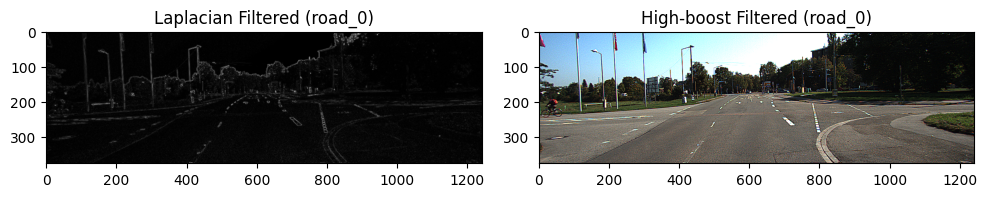

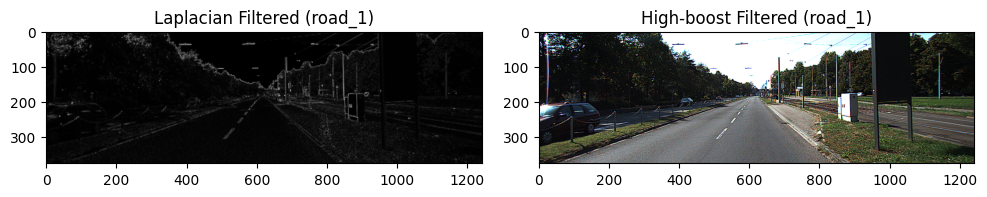

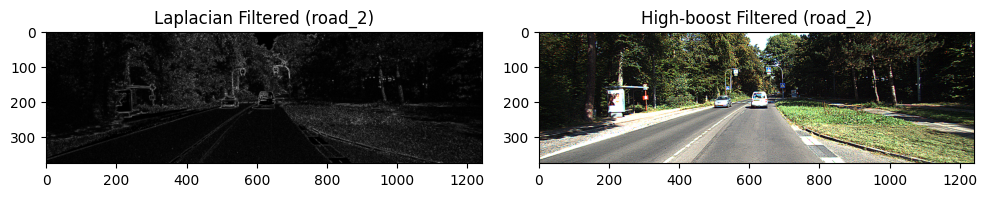

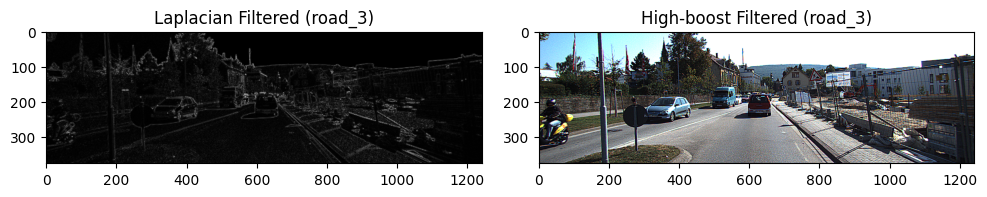

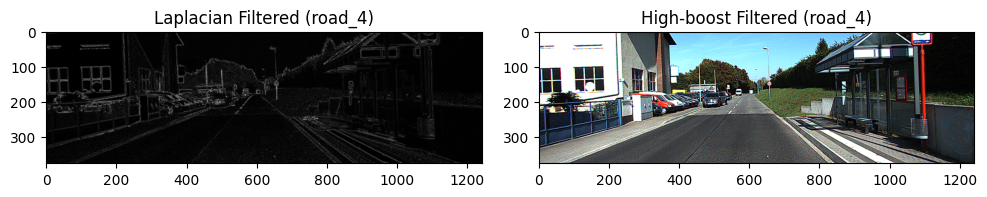

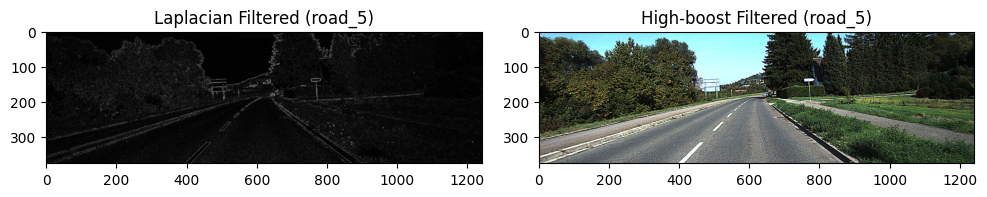

In [16]:
# TODO: Write program to apply Laclacian filter and High-boost filter to other road images
output_folder = "road_filtered_results"
os.makedirs(output_folder, exist_ok=True)

# Laplacian filter function
def apply_laplacian_filter(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lap = cv2.Laplacian(gray, cv2.CV_64F)
    lap_abs = cv2.convertScaleAbs(lap)
    return lap_abs

# Iterate through images
for idx, img_color in enumerate(road_images):
    # Apply Laplacian
    laplacian_abs = apply_laplacian_filter(img_color)
    out_lap = os.path.join(output_folder, f'road_{idx}_laplacian.png')
    cv2.imwrite(out_lap, laplacian_abs)
    print(f"Laplacian filtered image saved as '{out_lap}'")

    # Apply High-boost
    img_highboost = highboost_filter(img_color, boost_factor)
    out_high = os.path.join(output_folder, f'road_{idx}_highboost.png')
    cv2.imwrite(out_high, img_highboost)
    print(f"High-boost filtered image saved as '{out_high}'")

for idx, img_color in enumerate(road_images):
    laplacian_abs = apply_laplacian_filter(img_color)
    img_highboost = highboost_filter(img_color, boost_factor)
    # Display Laplacian filtered image
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(laplacian_abs, cmap='gray')
    plt.title(f'Laplacian Filtered (road_{idx})')

    # Display High-boost filtered image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img_highboost, cv2.COLOR_BGR2RGB))
    plt.title(f'High-boost Filtered (road_{idx})')

    plt.tight_layout()
    plt.show()
